In [18]:
from reverse_projection import ReverseProjection
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA as TFer
from sklearn.preprocessing import StandardScaler as Scaler
import matplotlib.pyplot as plt

In [19]:
X, y = load_iris(return_X_y=True)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [20]:
scaler = Scaler().fit(X)
scaled_X = scaler.transform(X)

In [21]:
# 降维
transformer = TFer().fit(scaled_X)
transformed_X = transformer.transform(scaled_X)

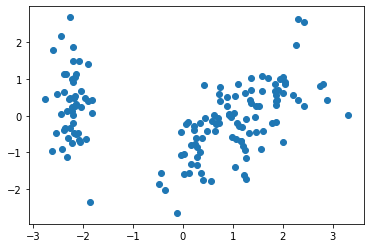

In [8]:
# 画图
plt.scatter(transformed_X[:,0],transformed_X[:,1])
plt.show()

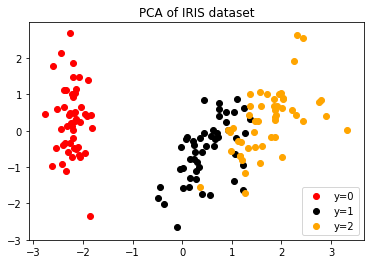

In [13]:
# transformed_X[y ==0,0]#采用布尔索引

#画出分类图
plt.figure()#创建一个画布
plt.scatter(transformed_X[y==0,0],transformed_X[y==0,1],c="red",label = 'y=0')
plt.scatter(transformed_X[y==1,0],transformed_X[y==1,1],c = "black",label = 'y=1')
plt.scatter(transformed_X[y==2,0],transformed_X[y==2,1],c="orange",label = 'y=2')
plt.legend()#显示图例
plt.title("PCA of IRIS dataset")#显示标题
plt.show()


In [22]:
# 调用ReverseProjection
rp1 = ReverseProjection(
    # 将零均值化后的特征传入feature_values，用于确定变量的上下限
    feature_values=scaled_X,
    # 传入PCA对象，用于构建降维前后的映射关系
    transformer=transformer,
    # 选择搜索方法
    # scipy_minimize调用子scipy.minimize模块
    # hpopt为此前所用的hyperopt模块
    # method="scipy_minimize",  # or hpopt
    method="hpopt",  # or hpopt
    # 最大迭代数
    iteration=1000,
    # 阈值，达到阈值后，搜索会提前结束
    criterion=0.001,
    # 开启搜索过程的打印信息
    verbose=False
)

In [28]:
# 调用search，并传入目标点，开始搜索
# result = rp1.search([-2, -2])
result = rp1.search([3, 0])
print(result)
inversed = scaler.inverse_transform(result['features'])
print(inversed)
# 目标点也可3维甚至高维
# result = rp1.search([1, 2, 3])

{'points': [3.006595123372344, 0.01777869746673766], 'features': [1.96025101133139, -0.8820433215424606, 2.5912838669289995, 0.4312315032447576], 'feature_names': ['XX0', 'XX1', 'XX2', 'XX3']}
[7.46113103 2.67416404 8.31711537 1.52693673]


In [29]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(scaled_X,y)
# test_scaled_x= scaler.transform(X)
test_X = [[7.46113103, 2.67416404, 8.31711537, 1.52693673]]
pred = svr.predict(scaler.transform(test_X))
print(pred)

[1.78650327]


In [ ]:
# 也可自定义变量的上下限
# 格式为
# ranges = dict(
# x1 = [bottom, top],
# x2 = [choice1, choice2, ...]
# )
# 比如load_iris的四个变量分别定义
# 注意要用scale后的数据
feature_ranges = dict(
    x1=[-1.0, 0.0],
    x2=[0.0, 1.0],
    x3=[-1.34, -1.20],
    x4=[-1.44, -1.31]
)
# 调用ReverseProjection
rp1 = ReverseProjection(
    feature_ranges=feature_ranges,
    transformer=transformer
)
# hpopt 与 scipy_minimize的孰优孰劣
# hpopt速度较慢一些，但可以传入choice比如[0, 1, 2]分别代表[高，中，低]
# scipy_minimize相对地快不少，但只能做连续数值的优化